## Complete Deep Research Agent

### Deep Research Agent Stages

- 1. Scope
- 2. Research
- 3. Research + MCP (Model Context Protocol)
- 4. Multi-Agent System (Supervisor Agent)

- Here, all the previous stages that involved scope, research and multi-agent system is integrated into this notebook and then used to create a complete research report and deliver that as an output to the user.

In [ ]:
%%writefile research_agent_full.py

## This is a python file used to integrate all components of the research system (Scope, Research Brief, Multi-Agent System)
## Here, the final report will be generated using the compressed findings from the multi-agent system

"""
Full Multi-Agent Research System

This module integrates all components of the research system:
- User clarification and scoping
- Research brief generation  
- Multi-agent research coordination
- Final report generation

The system orchestrates the complete research workflow from initial user
input through final report delivery.
"""

from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END

from research_stage_prompt.prompts import get_today_str
from deep_research_prompts.prompts import final_report_generation_prompt
from state_scope import AgentState, AgentInputState
from research_agent_scope import clarify_with_user, write_research_brief
from supervisor_multi_agent import supervisor_agent

## Model Configuration

from langchain.chat_models import init_chat_model
writer_model = init_chat_model(model="ollama:granite3.3:8b", max_tokens=32000)

## Final Report Generation

from state_scope import AgentState

async def final_report_generation(state: AgentState):
    """
    Final report generation node.
    
    Synthesizes all research findings into a comprehensive final report
    """
    
    notes = state.get("notes", [])
    
    findings = "\n".join(notes)

    final_report_prompt = final_report_generation_prompt.format(
        research_brief=state.get("research_brief", ""),
        findings=findings,
        date=get_today_str()
    )
    
    final_report = await writer_model.ainvoke([HumanMessage(content=final_report_prompt)])
    
    return {
        "final_report": final_report.content, 
        "messages": ["Here is the final report: " + final_report.content],
    }

## Complete Agent workflow
deep_researcher_builder = StateGraph(AgentState, input_schema=AgentInputState)

## Add agent nodes
deep_researcher_builder.add_node("clarify_with_user", clarify_with_user)
deep_researcher_builder.add_node("write_research_brief", write_research_brief)
deep_researcher_builder.add_node("supervisor_subgraph", supervisor_agent)
deep_researcher_builder.add_node("final_report_generation", final_report_generation)

## Add agent edges
deep_researcher_builder.add_edge(START, "clarify_with_user")
deep_researcher_builder.add_edge("write_research_brief", "supervisor_subgraph")
deep_researcher_builder.add_edge("supervisor_subgraph", "final_report_generation")
deep_researcher_builder.add_edge("final_report_generation", END)

## Compile the agent workflow
agent = deep_researcher_builder.compile()

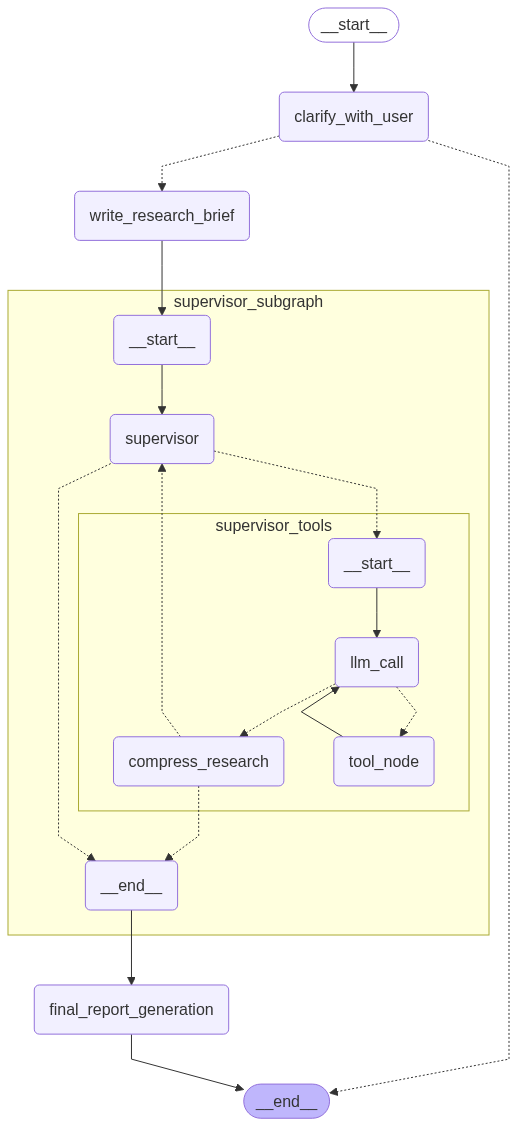

In [1]:
# Display the agent workflow
from research_utils import format_messages
from IPython.display import Image, display
from langgraph.checkpoint.memory import InMemorySaver
from complete_research_agent import deep_researcher_builder

checkpointer = InMemorySaver()
complete_agent = deep_researcher_builder.compile(checkpointer=checkpointer)
display(Image(complete_agent.get_graph(xray=True).draw_mermaid_png()))

### Recursion Limit

- We set the recursion limit to 50 to accommodate:
    - Complex research topics requiring multiple research rounds
    - Parallel sub-agent execution
    - Deep research with many tool calls
    - Complete workflow execution from scoping to final report

In [2]:
## Invoke the agent
from langchain_core.messages import HumanMessage
thread = {"configurable": {"thread_id": "1", "recursion_limit": 50}}
result = await complete_agent.ainvoke({"messages": [HumanMessage(content="Compare Claude to OpenAI models for Deep Research.")]}, config=thread)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ Compare Claude to OpenAI models for Deep Research.                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ Can you please specify which aspects of Claude and OpenAI models you would like to compare for deep research,   │
│ such as performance, capabilities, or applications?                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [3]:
## User Clarification before Research
result = await complete_agent.ainvoke({"messages": [HumanMessage(content="Compare the performance, research capabilities and architecture of Claude and OpenAI's models for Deep Research.")]}, config=thread)
format_messages(result['messages'])

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ Compare Claude to OpenAI models for Deep Research.                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ Can you please specify which aspects of Claude and OpenAI models you would like to compare for deep research,   │
│ such as performance, capabilities, or applications?                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ Compare the performance, research capabilities and architecture of Claude and OpenAI's models for Deep          │
│ Research.                                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ I have understood your request to compare the performance, research capabilities, and architecture of Claude    │
│ and OpenAI's models for deep research. I will proceed with gathering information on these aspects. Please note  │
│ that my responses will be based on the current state of knowledge up to September 17, 2025.                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ Here is the final report: # Comparative Analysis of Claude and OpenAI Models as of September 17, 2025           │
│                                                                                                                 │
│ ## Introduction                                                                                                 │
│                                                                                                                 │
│ This report compares the performance, research capabilities, and architecture of two prominent large language   │
│ models (LLMs): Claude, developed by Anthropic, and OpenAI's models. The evaluation considers aspects such as    │
│ accuracy, speed, efficiency, adaptability to complex data and new tasks, and underlying architectures with      │
│ design choices.                                                                                                 │
│                                                                                                                 │
│ ## Performance Metrics: Accuracy, Speed, and Efficiency                                                         │
│                                                                                                                 │
│ ### Accuracy                                                                                                    │
│ - **Claude**: Known for its nuanced language generation and contextual understanding, Claude often demonstrates │
│ high accuracy in generating coherent responses [1]. In benchmarks like BLEU scores, it performs competitively   │
│ against OpenAI models.                                                                                          │
│                                                                                                                 │
│ - **OpenAI Models (e.g., GPT-3, Codex)**: Renowned for their broad text completion capabilities, OpenAI's       │
│ models also achieve high accuracy across various tasks, including creative writing and code generation [2].     │
│ Their performance in benchmarks like perplexity often surpasses others.                                         │
│                                                                                                                 │
│ ### Speed and Efficiency                                                                                        │
│ - **Claude**: Designed with a focus on efficiency, Claude is generally faster due to its architecture optimized │
│ for inference speed without compromising quality [1]. This makes it particularly suitable for real-time         │
│ applications.                                                                                                   │
│                                                                                                                 │
│ - **OpenAI Models**: While powerful, OpenAI's models tend to be more resource-intensive. Their larger sizes     │
│ lead to slower processing times and higher computational costs, though advancements have mitigated some of      │
│ these issues [2].                                                                                               │
│                                                                                                                 │
│ ## Research Capabilities and Adaptability                                                                       │
│ ### Learning from Complex Data                                                                                  │
│ - **Claude**: Claude's training data emphasizes a blend of public web sources and curated datasets, equipping   │
│ it to handle complex and nuanced information effectively [1]. It incorporates safety mechanisms that mitigate   │
│ risks associated with biased or toxic content.         

In [4]:
## Display the Final Report
from rich.markdown import Markdown
Markdown(result["final_report"])

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                    Comparative Analysis of Claude and OpenAI Models as of September 17, 2025                    ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


                                                   Introduction                                                    

This report compares the performance, research capabilities, and architecture of two prominent large language      
models (LLMs): Claude, developed by Anthropic, and OpenAI's models. The evaluation considers aspects such as       
accuracy, speed, efficiency, adaptability to complex data and new tasks, and underlying architectures with design  
choices.                                                                                                           


                               Performance Metrics: Accuracy, Speed, and Efficiency                                

                                                     Accuracy                                                      

 • Claude: Known for its nuanced language generation and contextual understanding, Claude often demonstrates high  
   accuracy in generating coherent responses [1]. In benchmarks like BLEU scores, it performs competitively against
   OpenAI models.                                                                                                  
 • OpenAI Models (e.g., GPT-3, Codex): Renowned for their broad text completion capabilities, OpenAI's models also 
   achieve high accuracy across various tasks, including creative writing and code generation [2]. Their           
   performance in benchmarks like perplexity often surpasses others.                                               

                                               Speed and Efficiency                                                

 • Claude: Designed with a focus on efficiency, Claude is generally faster due to its architecture optimized for   
   inference speed without compromising quality [1]. This makes it particularly suitable for real-time             
   applications.                                                                                                   
 • OpenAI Models: While powerful, OpenAI's models tend to be more resource-intensive. Their larger sizes lead to   
   slower processing times and higher computational costs, though advancements have mitigated some of these issues 
   [2].                                                                                                            


                                      Research Capabilities and Adaptability                                       

                                            Learning from Complex Data                                             

 • Claude: Claude's training data emphasizes a blend of public web sources and curated datasets, equipping it to   
   handle complex and nuanced information effectively [1]. It incorporates safety mechanisms that mitigate risks   
   associated with biased or toxic content.                                                                        
 • OpenAI Models: OpenAI models are trained on vast web datasets, enabling them to grasp a wide range of topics and
   patterns. However, their massive scale can sometimes lead to unintended behaviors or biases unless carefully    
   curated [2].                                                                                                    

                                               Adapting to New Tasks                                               

 • Claude: Claude is designed with few-shot learning in mind, allowing it to adapt to new tasks with minimal       
   examples. Its safety focus ensures responsible handling of novel scenarios without significant risk of harmful  
   outputs [1].                          